In [1]:
import pandas as pd
import numpy as np
import scipy as scp 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
input_df = pd.read_csv('./CC-Approval-Prediction/label_df.csv')
input_df.shape

(8116, 20)

###### Very highly Imbalanced prolem to model .

1. Good book clients are considered by taking a window of len atleast 30 months history and not having status as '3', '4' and '5'

2. 3.4% of bad clients in the sample.

In [4]:
input_df['label'].value_counts()

good    7838
bad      278
Name: label, dtype: int64

In [5]:
(278/(7838 + 278)) * 100.0

3.4253326761951706

In [6]:
input_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,risk_start_month,label
0,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,39,good
1,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,43,good
2,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0,32,good
3,5008832,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0,35,good
4,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10968,-1620,1,0,0,0,NaN,2.0,45,good


###### Only Occupation is missing. 

1.Instead of dropping the column, lets impute the occupation with a category called missing.

In [7]:
input_df.isna().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        2549
CNT_FAM_MEMBERS           0
risk_start_month          0
label                     0
dtype: int64

In [8]:
# missing is not givin much info as it is proportionally represented in the label..
input_df[input_df["OCCUPATION_TYPE"].isna()]["label"].value_counts()

good    2455
bad       94
Name: label, dtype: int64

<AxesSubplot:xlabel='OCCUPATION_TYPE'>

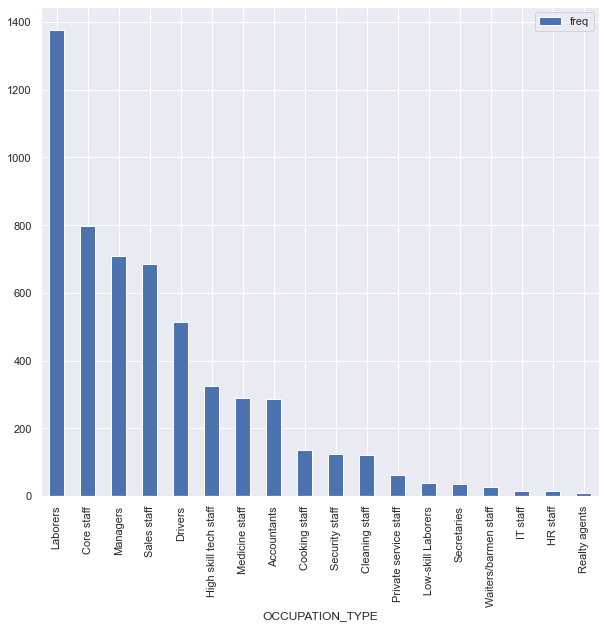

In [9]:
plt_df = input_df['OCCUPATION_TYPE'].value_counts().reset_index()
plt_df.columns = ["OCCUPATION_TYPE", "freq"]
plt_df.plot(x="OCCUPATION_TYPE", y="freq", kind="bar", figsize=(10, 9))

In [10]:
input_df.fillna({"OCCUPATION_TYPE": 'missing'}, inplace=True)

###### Some points to consider based on the describe method..

1. No variablility in FLAG_MOBI, std is zero. (Exclude this column in analysis, no info)

2. DAYS_EMPLOYED, max value is 365243. Looks suspicious need to check for outliers. Based on the data description, positive value signifies unemployment. 

3. 75% of the people dont have a work phone.

4. Max count of children is 14. Looks like a outlier

In [11]:
input_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,risk_start_month
count,8.116000e+03,8116.000000,8.116000e+03,8116.000000,8116.000000,8116.0,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000
mean,5.079139e+06,0.415106,1.872399e+05,-16347.929029,60037.515648,1.0,0.233243,0.305323,0.090192,2.200468,42.165229
std,4.141470e+04,0.753591,1.005039e+05,4051.476065,138653.588108,0.0,0.422922,0.460572,0.286475,0.907886,9.838620
min,5.008811e+06,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,4.000000
25%,5.045829e+06,0.000000,1.215000e+05,-19654.000000,-3453.500000,1.0,0.000000,0.000000,0.000000,2.000000,36.000000
50%,5.069422e+06,0.000000,1.620000e+05,-16053.000000,-1773.500000,1.0,0.000000,0.000000,0.000000,2.000000,41.000000
75%,5.115612e+06,1.000000,2.250000e+05,-12953.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,49.000000
max,5.150475e+06,14.000000,1.575000e+06,-8347.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,61.000000


In [12]:
input_df.drop('FLAG_MOBIL', axis = 1, inplace=True)

In [13]:
(input_df["DAYS_BIRTH"]/-365.0).describe()

count    8116.000000
mean       44.788847
std        11.099934
min        22.868493
25%        35.487671
50%        43.980822
75%        53.846575
max        68.909589
Name: DAYS_BIRTH, dtype: float64

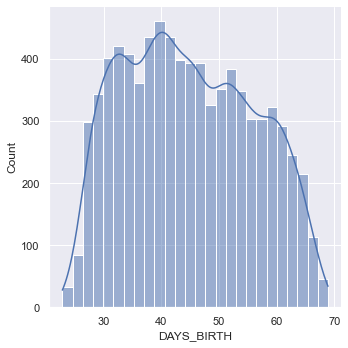

In [14]:
sns.displot(input_df["DAYS_BIRTH"]/-365.0, kde=True)

<AxesSubplot:xlabel='label', ylabel='DAYS_BIRTH'>

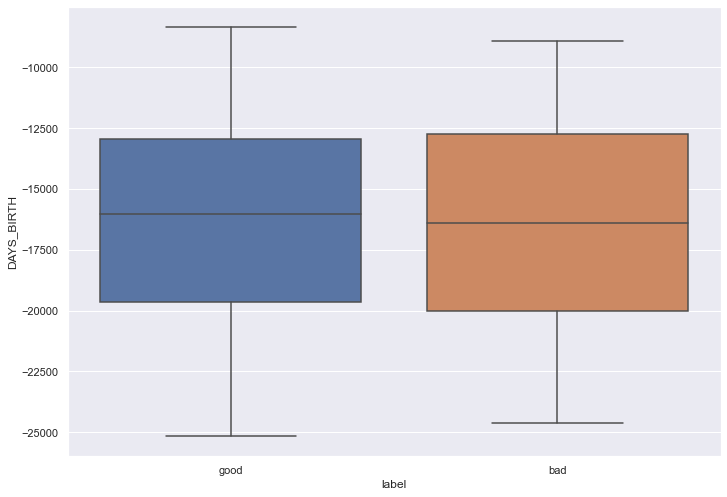

In [15]:
sns.boxplot(x = "label", y="DAYS_BIRTH", data=input_df)

In [16]:
input_df.groupby("label").apply(lambda x: (x["DAYS_BIRTH"]/365.0).median())

label
bad    -44.967123
good   -43.923288
dtype: float64

###### Except some outliers, no relationship is seen between Age & Income 

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='AMT_INCOME_TOTAL'>

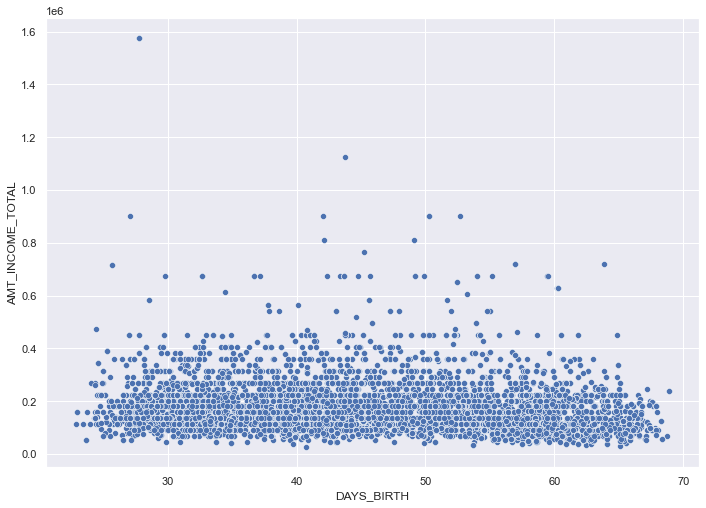

In [17]:
sns.scatterplot(x=input_df["DAYS_BIRTH"]/-365.0, y=input_df['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='label', ylabel='AMT_INCOME_TOTAL'>

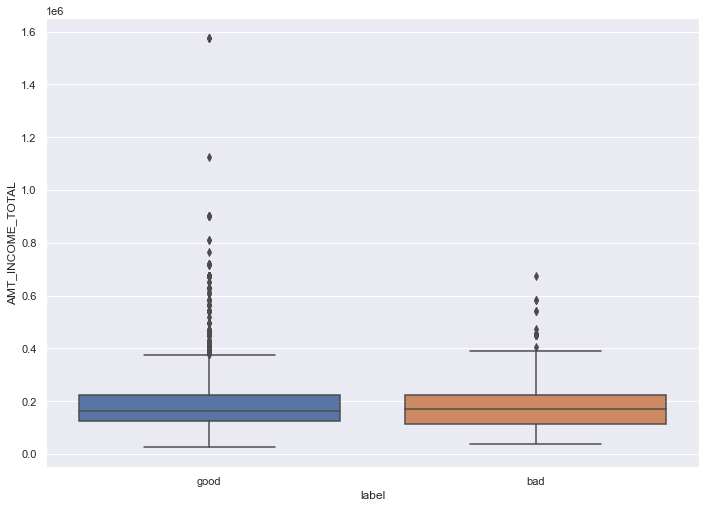

In [18]:
sns.boxplot(x = "label", y="AMT_INCOME_TOTAL", data=input_df)

###### Income is not showing as a differentiating factor 

In [19]:
input_df.groupby('label')["AMT_INCOME_TOTAL"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
bad,278.0,191143.165468,105955.990319,36000.0,112500.0,171000.0,225000.0,675000.0
good,7838.0,187101.501786,100309.406896,27000.0,126000.0,161100.0,225000.0,1575000.0


In [20]:
input_df.groupby('label')["DAYS_BIRTH"].describe()[:]/-365

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
bad,-0.761644,45.144279,-11.898078,67.427397,54.816438,44.967123,34.946575,24.402740
good,-21.473973,44.776240,-11.071172,68.909589,53.786301,43.923288,35.487671,22.868493


###### EDA on days Employed 

1. 1388 people in the sample are unemployed (As the value is +ve and looks like it is imputed with some high value)
   if we are building tree based model, we can leave as it is to differentiate with others.
   
2. Bad accounts of unemployed people are 4.32 % compared to 3.4%.

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

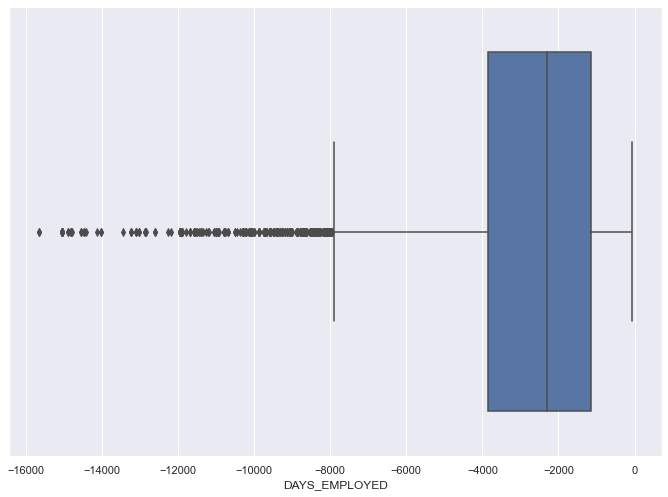

In [21]:
sns.boxplot(x=input_df[input_df['DAYS_EMPLOYED'] <= 0]['DAYS_EMPLOYED'])

###### Days employed looks skewed 

1. Majority of the people fall under 13 years of employment..

positive values:  (1388,)


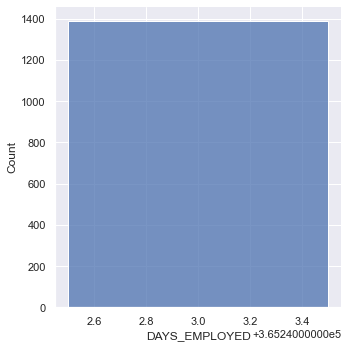

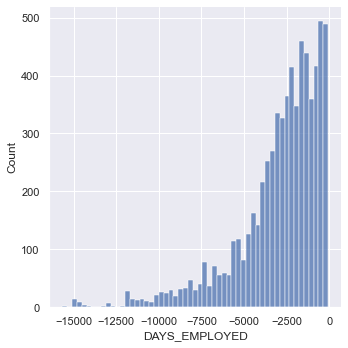

In [22]:
print("positive values: ", input_df[input_df['DAYS_EMPLOYED'] >= 0]['DAYS_EMPLOYED'].shape)
sns.displot(input_df[input_df['DAYS_EMPLOYED'] >= 0]['DAYS_EMPLOYED'])
sns.displot(input_df[input_df['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED']) 

In [23]:
unemployed_df = input_df[input_df['DAYS_EMPLOYED'] >= 0]
unemployed_df["label"].value_counts()

good    1328
bad       60
Name: label, dtype: int64

In [24]:
(60/(1328 + 60)) * 100.0

4.322766570605188

###### Created IS_employed variable

In [25]:
input_df["IS_EMPLOYED"] = input_df["DAYS_EMPLOYED"].apply(lambda x: 0 if x >= 0 else 1)

<AxesSubplot:xlabel='OCCUPATION_TYPE'>

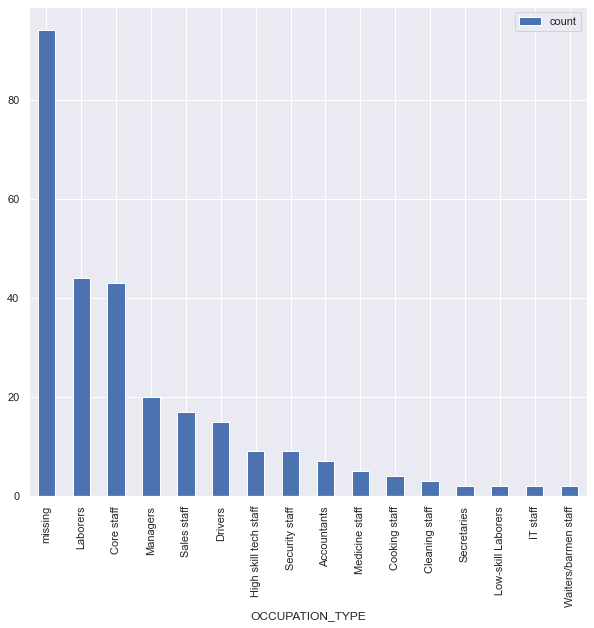

In [26]:
plt_df = input_df[input_df["label"] == 'bad']["OCCUPATION_TYPE"].value_counts().reset_index()
plt_df.columns = ["OCCUPATION_TYPE", 'count']


plt_df.plot(x="OCCUPATION_TYPE", y="count", kind="bar", figsize=(10, 9))

<AxesSubplot:xlabel='OCCUPATION_TYPE'>

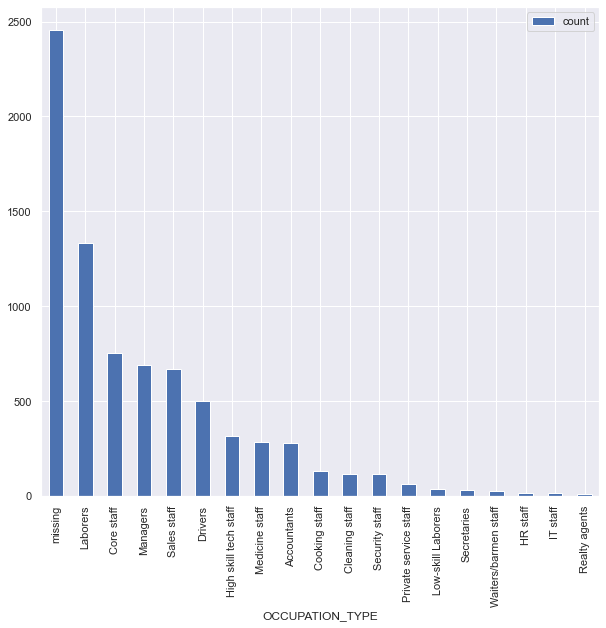

In [27]:
plt_df = input_df[input_df["label"] == 'good']["OCCUPATION_TYPE"].value_counts().reset_index()
plt_df.columns = ["OCCUPATION_TYPE", 'count']


plt_df.plot(x="OCCUPATION_TYPE", y="count", kind="bar", figsize=(10, 9))

###### Outliers are present in both in count of family members as count of children.
###### Can discard these rows, if we want to build linear models. 

###### remove samples where CNT_FAM_MEMBERS > 6. Maximum value is 15

<AxesSubplot:xlabel='label', ylabel='CNT_FAM_MEMBERS'>

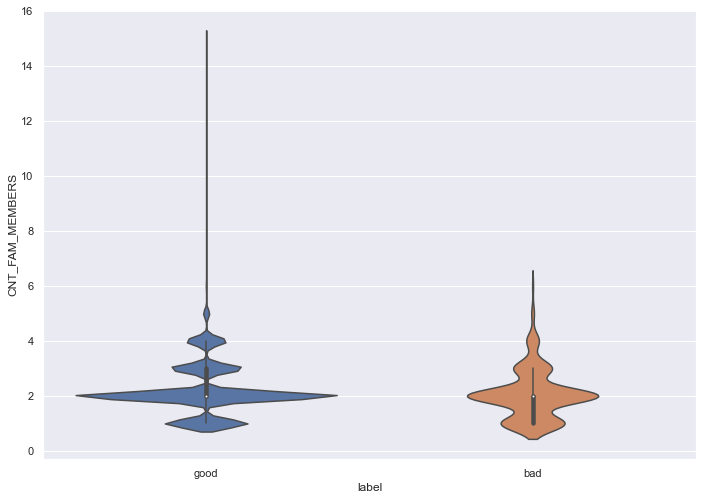

In [28]:
sns.violinplot(x = "label", y="CNT_FAM_MEMBERS", data=input_df)

In [29]:
input_df.groupby('label')['CNT_FAM_MEMBERS'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
bad,278.0,2.046763,0.875647,1.0,1.0,2.0,2.0,6.0
good,7838.0,2.205920,0.908584,1.0,2.0,2.0,3.0,15.0


<AxesSubplot:xlabel='label', ylabel='CNT_CHILDREN'>

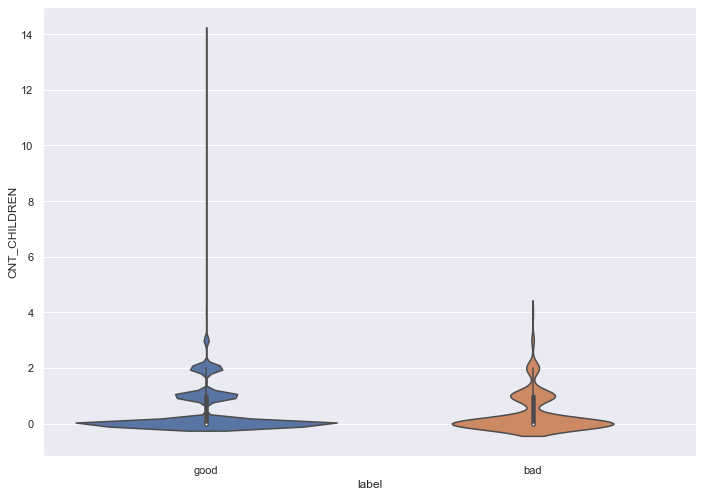

In [30]:
sns.violinplot(x = "label", y="CNT_CHILDREN", data=input_df)

In [31]:
print(np.percentile(input_df['CNT_FAM_MEMBERS'], q=[50, 80, 95, 99, 100]))
print(np.percentile(input_df['CNT_CHILDREN'], q=[50, 80, 95, 99, 100]))

[ 2.  3.  4.  5. 15.]
[ 0.  1.  2.  3. 14.]


In [32]:
input_df[(input_df["CNT_FAM_MEMBERS"] <= 6) & (input_df["CNT_CHILDREN"] <= 4)].reset_index(drop=True, inplace=True)

###### Convert days_to_birth to years age in years for better interpretability
###### convert DAYS_EMPLOYED into employment_in_months and for positive values impute with zero

In [33]:
input_df['age_in_years'] = (-input_df["DAYS_BIRTH"]/365.0)

input_df['employment_in_months'] = (input_df["DAYS_EMPLOYED"]/365.0) * 12.0
input_df['employment_in_months'] = input_df['employment_in_months'].map(lambda x: 0 if x > 0 else -x)

###### Splitting the data 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import auc, f1_score, confusion_matrix, balanced_accuracy_score

In [35]:
numeric_cols = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "age_in_years", \
                "employment_in_months", 'CNT_FAM_MEMBERS']



categorical_cols = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", \
                    "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", \
                   "NAME_HOUSING_TYPE", 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', \
                   "OCCUPATION_TYPE"]

feats = numeric_cols + categorical_cols
label_col = 'label'

print("len of numeric cols: ", len(numeric_cols))
print("len of categorical cols: ", len(categorical_cols))


X_train, X_test, y_train, y_test = train_test_split(input_df[feats], input_df[label_col], \
                                                      stratify=input_df[label_col], test_size=0.1, random_state=99)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, \
                                                      stratify=y_train, test_size=0.1, random_state=99)

print('train label : ', y_train.value_counts())
print()
print('Valid label : ', y_valid.value_counts())
print()
print('test label : ', y_test.value_counts())

# Encode categorical to OHE, SKLEAR ensemble needs the columns to be encoded 
ohe_input_df = pd.get_dummies(input_df[feats], columns=categorical_cols, drop_first=True)

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(ohe_input_df, input_df[label_col], \
                                                    stratify=input_df[label_col], test_size=0.1, random_state=101)

X_train_ohe, X_valid_ohe, y_train_ohe, y_valid_ohe = train_test_split(X_train_ohe, y_train_ohe, \
                                                                      stratify=y_train_ohe, test_size=0.1, random_state=101)

len of numeric cols:  5
len of categorical cols:  11
train label :  good    6348
bad      225
Name: label, dtype: int64

Valid label :  good    706
bad      25
Name: label, dtype: int64

test label :  good    784
bad      28
Name: label, dtype: int64


###### Training gradient Boosted decesion tree

In [36]:
from catboost import CatBoostClassifier, Pool

In [37]:
pool_train_data = Pool(X_train, y_train, cat_features=categorical_cols)
pool_valid_data = Pool(X_valid, y_valid, cat_features=categorical_cols)

#scale_pos_weight=0.2, class_weights=(10, 1), default is 500
model = CatBoostClassifier(verbose=True, use_best_model=True, scale_pos_weight=0.05, iterations= 200)

model.fit(pool_train_data, eval_set=pool_valid_data)
print("get best iteration: ", model.get_best_iteration())

Learning rate set to 0.101613
0:	learn: 0.6732001	test: 0.6753231	best: 0.6753231 (0)	total: 196ms	remaining: 39s
1:	learn: 0.6525992	test: 0.6572598	best: 0.6572598 (1)	total: 253ms	remaining: 25.1s
2:	learn: 0.6391666	test: 0.6483730	best: 0.6483730 (2)	total: 319ms	remaining: 20.9s
3:	learn: 0.6250441	test: 0.6434415	best: 0.6434415 (3)	total: 384ms	remaining: 18.8s
4:	learn: 0.6056005	test: 0.6255155	best: 0.6255155 (4)	total: 451ms	remaining: 17.6s
5:	learn: 0.5915923	test: 0.6340543	best: 0.6255155 (4)	total: 516ms	remaining: 16.7s
6:	learn: 0.5779289	test: 0.6306056	best: 0.6255155 (4)	total: 581ms	remaining: 16s
7:	learn: 0.5653475	test: 0.6218047	best: 0.6218047 (7)	total: 649ms	remaining: 15.6s
8:	learn: 0.5549531	test: 0.6148741	best: 0.6148741 (8)	total: 719ms	remaining: 15.3s
9:	learn: 0.5468304	test: 0.6107163	best: 0.6107163 (9)	total: 787ms	remaining: 14.9s
10:	learn: 0.5364240	test: 0.6146137	best: 0.6107163 (9)	total: 857ms	remaining: 14.7s
11:	learn: 0.5265413	test: 

94:	learn: 0.2362336	test: 0.6348952	best: 0.5980380 (20)	total: 11.1s	remaining: 12.3s
95:	learn: 0.2353810	test: 0.6383965	best: 0.5980380 (20)	total: 11.3s	remaining: 12.2s
96:	learn: 0.2330904	test: 0.6395800	best: 0.5980380 (20)	total: 11.4s	remaining: 12.1s
97:	learn: 0.2323837	test: 0.6408024	best: 0.5980380 (20)	total: 11.6s	remaining: 12s
98:	learn: 0.2308722	test: 0.6392473	best: 0.5980380 (20)	total: 11.7s	remaining: 11.9s
99:	learn: 0.2295757	test: 0.6373602	best: 0.5980380 (20)	total: 11.8s	remaining: 11.8s
100:	learn: 0.2275535	test: 0.6338624	best: 0.5980380 (20)	total: 12s	remaining: 11.7s
101:	learn: 0.2268429	test: 0.6346622	best: 0.5980380 (20)	total: 12.1s	remaining: 11.6s
102:	learn: 0.2241170	test: 0.6421442	best: 0.5980380 (20)	total: 12.2s	remaining: 11.5s
103:	learn: 0.2208032	test: 0.6465841	best: 0.5980380 (20)	total: 12.4s	remaining: 11.4s
104:	learn: 0.2185695	test: 0.6426052	best: 0.5980380 (20)	total: 12.5s	remaining: 11.3s
105:	learn: 0.2150031	test: 0.6

188:	learn: 0.1235467	test: 0.7482096	best: 0.5980380 (20)	total: 23.8s	remaining: 1.38s
189:	learn: 0.1229131	test: 0.7475847	best: 0.5980380 (20)	total: 23.9s	remaining: 1.26s
190:	learn: 0.1217610	test: 0.7480341	best: 0.5980380 (20)	total: 24s	remaining: 1.13s
191:	learn: 0.1207859	test: 0.7534779	best: 0.5980380 (20)	total: 24.2s	remaining: 1.01s
192:	learn: 0.1205922	test: 0.7538904	best: 0.5980380 (20)	total: 24.3s	remaining: 881ms
193:	learn: 0.1200024	test: 0.7584167	best: 0.5980380 (20)	total: 24.4s	remaining: 756ms
194:	learn: 0.1195525	test: 0.7587179	best: 0.5980380 (20)	total: 24.6s	remaining: 630ms
195:	learn: 0.1188079	test: 0.7632602	best: 0.5980380 (20)	total: 24.7s	remaining: 504ms
196:	learn: 0.1173137	test: 0.7695178	best: 0.5980380 (20)	total: 24.9s	remaining: 378ms
197:	learn: 0.1170617	test: 0.7692979	best: 0.5980380 (20)	total: 25s	remaining: 253ms
198:	learn: 0.1164484	test: 0.7699416	best: 0.5980380 (20)	total: 25.1s	remaining: 126ms
199:	learn: 0.1156974	tes

In [38]:
predictions = ['good' if val >= 0.5 else 'bad' for val in model.predict_proba(pool_valid_data)[:, 1]]
cf_df = pd.DataFrame(confusion_matrix(y_valid, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

,GT_BAD,GT_GOOD
PREDS_BAD,11,40
PREDS_GOOD,14,666


In [39]:
model.classes_

array(['bad', 'good'], dtype=object)

###### Handling Imbalance problem by applying different sampling techniques

In [40]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

###### Perform SMOTE to create synthetic minority samples using KNN and also perform undersampling on Majority class.

###### Applied class weights, to weigh the negative examples more 

In [41]:
cat_feats_mask = [True if col in categorical_cols else False for col in X_train.columns]
smote_over = SMOTENC(categorical_features=cat_feats_mask, sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=0.1)

X_resampled, y_resampled = smote_over.fit_resample(X_train, y_train)
print("SMOTE value_counts: ", y_resampled.value_counts())

X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)
print("Undersampling value_counts: ", y_resampled.value_counts())

SMOTE value_counts:  good    6348
bad      317
Name: label, dtype: int64
Undersampling value_counts:  good    3170
bad      317
Name: label, dtype: int64


In [42]:
resampled_df = pd.concat([X_resampled, y_resampled], axis = 1).sample(frac=1)
X_train_resampled, y_train_resampled  = resampled_df[feats], resampled_df[label_col]

In [43]:
pool_train_data = Pool(X_train_resampled, y_train_resampled, cat_features=categorical_cols)
pool_valid_data = Pool(X_valid, y_valid, cat_features=categorical_cols)

#Apply class_weights=(10, 1) to tackle the imbalance problem..
cat_boost_model = CatBoostClassifier(verbose=True, use_best_model=True, class_weights=(10, 1), \
                                     iterations= 500)

cat_boost_model.fit(pool_train_data, eval_set=pool_valid_data)
print("get best iteration: ", cat_boost_model.get_best_iteration())

Learning rate set to 0.058323
0:	learn: 0.6861656	test: 0.6901026	best: 0.6901026 (0)	total: 93.6ms	remaining: 46.7s
1:	learn: 0.6795155	test: 0.6841669	best: 0.6841669 (1)	total: 219ms	remaining: 54.6s
2:	learn: 0.6746064	test: 0.6795639	best: 0.6795639 (2)	total: 346ms	remaining: 57.2s
3:	learn: 0.6668233	test: 0.6769413	best: 0.6769413 (3)	total: 471ms	remaining: 58.4s
4:	learn: 0.6644925	test: 0.6757565	best: 0.6757565 (4)	total: 560ms	remaining: 55.4s
5:	learn: 0.6613722	test: 0.6724564	best: 0.6724564 (5)	total: 687ms	remaining: 56.6s
6:	learn: 0.6561618	test: 0.6692298	best: 0.6692298 (6)	total: 811ms	remaining: 57.1s
7:	learn: 0.6544121	test: 0.6669278	best: 0.6669278 (7)	total: 892ms	remaining: 54.8s
8:	learn: 0.6501232	test: 0.6638408	best: 0.6638408 (8)	total: 1.03s	remaining: 56.3s
9:	learn: 0.6480117	test: 0.6622580	best: 0.6622580 (9)	total: 1.16s	remaining: 56.8s
10:	learn: 0.6429364	test: 0.6617297	best: 0.6617297 (10)	total: 1.3s	remaining: 57.7s
11:	learn: 0.6401106	t

95:	learn: 0.5009691	test: 0.5932891	best: 0.5932891 (95)	total: 10.9s	remaining: 45.9s
96:	learn: 0.4989868	test: 0.5927689	best: 0.5927689 (96)	total: 11s	remaining: 45.9s
97:	learn: 0.4970128	test: 0.5923034	best: 0.5923034 (97)	total: 11.2s	remaining: 45.8s
98:	learn: 0.4958770	test: 0.5921122	best: 0.5921122 (98)	total: 11.3s	remaining: 45.6s
99:	learn: 0.4954636	test: 0.5913689	best: 0.5913689 (99)	total: 11.4s	remaining: 45.5s
100:	learn: 0.4944966	test: 0.5912483	best: 0.5912483 (100)	total: 11.5s	remaining: 45.5s
101:	learn: 0.4944725	test: 0.5911715	best: 0.5911715 (101)	total: 11.6s	remaining: 45.2s
102:	learn: 0.4941355	test: 0.5908048	best: 0.5908048 (102)	total: 11.7s	remaining: 45.1s
103:	learn: 0.4939000	test: 0.5907545	best: 0.5907545 (103)	total: 11.8s	remaining: 45s
104:	learn: 0.4916851	test: 0.5914031	best: 0.5907545 (103)	total: 11.9s	remaining: 45s
105:	learn: 0.4876520	test: 0.5850180	best: 0.5850180 (105)	total: 12.1s	remaining: 44.9s
106:	learn: 0.4872788	test

187:	learn: 0.3520900	test: 0.5145058	best: 0.5143943 (186)	total: 22.3s	remaining: 37.1s
188:	learn: 0.3491746	test: 0.5128769	best: 0.5128769 (188)	total: 22.5s	remaining: 37s
189:	learn: 0.3477545	test: 0.5124592	best: 0.5124592 (189)	total: 22.6s	remaining: 36.9s
190:	learn: 0.3472578	test: 0.5122334	best: 0.5122334 (190)	total: 22.7s	remaining: 36.8s
191:	learn: 0.3464515	test: 0.5118896	best: 0.5118896 (191)	total: 22.9s	remaining: 36.7s
192:	learn: 0.3450959	test: 0.5133838	best: 0.5118896 (191)	total: 23s	remaining: 36.6s
193:	learn: 0.3431900	test: 0.5113654	best: 0.5113654 (193)	total: 23.1s	remaining: 36.5s
194:	learn: 0.3408832	test: 0.5099311	best: 0.5099311 (194)	total: 23.3s	remaining: 36.4s
195:	learn: 0.3404583	test: 0.5104775	best: 0.5099311 (194)	total: 23.4s	remaining: 36.3s
196:	learn: 0.3383423	test: 0.5100672	best: 0.5099311 (194)	total: 23.5s	remaining: 36.2s
197:	learn: 0.3357997	test: 0.5141168	best: 0.5099311 (194)	total: 23.7s	remaining: 36.1s
198:	learn: 0.

280:	learn: 0.2389276	test: 0.4928785	best: 0.4899396 (261)	total: 34.8s	remaining: 27.1s
281:	learn: 0.2376619	test: 0.4922941	best: 0.4899396 (261)	total: 35s	remaining: 27s
282:	learn: 0.2375696	test: 0.4922027	best: 0.4899396 (261)	total: 35.1s	remaining: 26.9s
283:	learn: 0.2373055	test: 0.4920486	best: 0.4899396 (261)	total: 35.3s	remaining: 26.9s
284:	learn: 0.2364955	test: 0.4912955	best: 0.4899396 (261)	total: 35.4s	remaining: 26.7s
285:	learn: 0.2360805	test: 0.4921545	best: 0.4899396 (261)	total: 35.6s	remaining: 26.6s
286:	learn: 0.2354806	test: 0.4918661	best: 0.4899396 (261)	total: 35.7s	remaining: 26.5s
287:	learn: 0.2329834	test: 0.4912038	best: 0.4899396 (261)	total: 35.8s	remaining: 26.4s
288:	learn: 0.2322818	test: 0.4946493	best: 0.4899396 (261)	total: 36s	remaining: 26.2s
289:	learn: 0.2316890	test: 0.4946299	best: 0.4899396 (261)	total: 36.1s	remaining: 26.1s
290:	learn: 0.2308164	test: 0.4936826	best: 0.4899396 (261)	total: 36.2s	remaining: 26s
291:	learn: 0.2305

372:	learn: 0.1771263	test: 0.4895905	best: 0.4856737 (350)	total: 46.8s	remaining: 15.9s
373:	learn: 0.1769187	test: 0.4897311	best: 0.4856737 (350)	total: 46.9s	remaining: 15.8s
374:	learn: 0.1764551	test: 0.4912306	best: 0.4856737 (350)	total: 47s	remaining: 15.7s
375:	learn: 0.1757906	test: 0.4920415	best: 0.4856737 (350)	total: 47.2s	remaining: 15.6s
376:	learn: 0.1753857	test: 0.4926095	best: 0.4856737 (350)	total: 47.3s	remaining: 15.4s
377:	learn: 0.1747264	test: 0.4922991	best: 0.4856737 (350)	total: 47.4s	remaining: 15.3s
378:	learn: 0.1737422	test: 0.4925253	best: 0.4856737 (350)	total: 47.6s	remaining: 15.2s
379:	learn: 0.1732535	test: 0.4920549	best: 0.4856737 (350)	total: 47.7s	remaining: 15.1s
380:	learn: 0.1728638	test: 0.4917480	best: 0.4856737 (350)	total: 47.8s	remaining: 14.9s
381:	learn: 0.1720772	test: 0.4905678	best: 0.4856737 (350)	total: 47.9s	remaining: 14.8s
382:	learn: 0.1717595	test: 0.4901245	best: 0.4856737 (350)	total: 48s	remaining: 14.7s
383:	learn: 0.

464:	learn: 0.1392555	test: 0.4906884	best: 0.4833675 (425)	total: 58.6s	remaining: 4.41s
465:	learn: 0.1390401	test: 0.4903249	best: 0.4833675 (425)	total: 58.7s	remaining: 4.29s
466:	learn: 0.1388092	test: 0.4899335	best: 0.4833675 (425)	total: 58.9s	remaining: 4.16s
467:	learn: 0.1385618	test: 0.4902497	best: 0.4833675 (425)	total: 59s	remaining: 4.03s
468:	learn: 0.1382824	test: 0.4901391	best: 0.4833675 (425)	total: 59.1s	remaining: 3.91s
469:	learn: 0.1379436	test: 0.4900361	best: 0.4833675 (425)	total: 59.3s	remaining: 3.78s
470:	learn: 0.1376074	test: 0.4901232	best: 0.4833675 (425)	total: 59.4s	remaining: 3.66s
471:	learn: 0.1372843	test: 0.4897737	best: 0.4833675 (425)	total: 59.5s	remaining: 3.53s
472:	learn: 0.1367603	test: 0.4892646	best: 0.4833675 (425)	total: 59.6s	remaining: 3.4s
473:	learn: 0.1361888	test: 0.4890604	best: 0.4833675 (425)	total: 59.8s	remaining: 3.28s
474:	learn: 0.1356352	test: 0.4902044	best: 0.4833675 (425)	total: 59.9s	remaining: 3.15s
475:	learn: 0

In [44]:
predictions = ['good' if val >= 0.5 else 'bad' for val in cat_boost_model.predict_proba(pool_valid_data)[:, 1]]

# average recall on two classes
print(balanced_accuracy_score(y_valid, predictions))

cf_df = pd.DataFrame(confusion_matrix(y_valid, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

0.7180453257790368


,GT_BAD,GT_GOOD
PREDS_BAD,12,31
PREDS_GOOD,13,675


###### Ensemble of samplers 

1. Balanced bagging classifier will grow classifier (Tree) based on balanced bootstraped samples

2. Also try Ensemble like Adaboost classifier and Random forest classifier combined with different balanced booststrap techniques..

3. These are Ensembles combined with Random undersampling technique, to fit each base estimator in the ensemble

In [45]:
from imblearn.ensemble import BalancedBaggingClassifier

In [46]:

# Make positive samples five times the negative classes in every boot strap sample 
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                n_estimators = 200,
                                sampling_strategy=0.3,
                                replacement=False,
                                random_state=101)


bbc.fit(X_train_ohe, y_train_ohe)
predictions = bbc.predict(X_valid_ohe)
b_acc_score = balanced_accuracy_score(y_valid_ohe, predictions)
print("Balanced accuracy score: ", b_acc_score)
cf_df = pd.DataFrame(confusion_matrix(y_valid_ohe, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

Balanced accuracy score:  0.7507932011331444


,GT_BAD,GT_GOOD
PREDS_BAD,13,13
PREDS_GOOD,12,693


###### Use Adaboost classifier as the weak learner 

In [47]:
from imblearn.ensemble import EasyEnsembleClassifier

# Default estimator is AdaBoostClassifier
adaboost_estimator = AdaBoostClassifier(n_estimators=50)

eec = EasyEnsembleClassifier(random_state=0, base_estimator = adaboost_estimator, n_estimators = 50, \
                             sampling_strategy=0.3, \
                             replacement=False)

eec.fit(X_train_ohe, y_train_ohe)

predictions = eec.predict(X_valid_ohe)

b_acc_score = balanced_accuracy_score(y_valid_ohe, predictions)
print("Balanced accuracy score: ", b_acc_score)
cf_df = pd.DataFrame(confusion_matrix(y_valid_ohe, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

Balanced accuracy score:  0.5286685552407933


,GT_BAD,GT_GOOD
PREDS_BAD,2,16
PREDS_GOOD,23,690


In [48]:
from imblearn.ensemble import BalancedRandomForestClassifier



brf = BalancedRandomForestClassifier(n_estimators=100, \
                                     random_state=0, sampling_strategy=0.2)

brf.fit(X_train_ohe, y_train_ohe)


#predict probabilities
predictions = ['good' if val >= 0.75 else 'bad' for val in brf.predict_proba(X_valid_ohe)[:, 1]]

b_acc_score = balanced_accuracy_score(y_valid_ohe, predictions)
print("Balanced accuracy score: ", b_acc_score)
cf_df = pd.DataFrame(confusion_matrix(y_valid_ohe, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

Balanced accuracy score:  0.7546742209631727


,GT_BAD,GT_GOOD
PREDS_BAD,15,64
PREDS_GOOD,10,642


In [49]:
from imblearn.ensemble import RUSBoostClassifier

In [50]:
rusboost = RUSBoostClassifier(n_estimators=250, algorithm='SAMME.R',
                              random_state=0, base_estimator=DecisionTreeClassifier(max_depth=2), \
                              sampling_strategy=0.1)

rusboost.fit(X_train_ohe, y_train_ohe)
predictions = rusboost.predict(X_valid_ohe)

#predict probabilities
predictions = ['good' if val >= 0.5 else 'bad' for val in rusboost.predict_proba(X_valid_ohe)[:, 1]]

b_acc_score = balanced_accuracy_score(y_valid_ohe, predictions)
print("Balanced accuracy score: ", b_acc_score)
cf_df = pd.DataFrame(confusion_matrix(y_valid_ohe, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

SyntaxError: invalid syntax (Temp/ipykernel_74052/2207499885.py, line 8)

###### Tweaking the Probability threshold on the balancedRandomForestClassifier earlier on Validation set gave us the balanced accuracy score of 0.75.

###### For the same threshold 0.75, ontest set it gave Balanced accuracy as 0.77

###### Below is the confusion matrix & balanced accuracy on the test set.

In [51]:
#predict probabilities on Test set

predictions = ['good' if val >= 0.75 else 'bad' for val in brf.predict_proba(X_test_ohe)[:, 1]]

b_acc_score = balanced_accuracy_score(y_test_ohe, predictions)
print("Balanced accuracy score: ", b_acc_score)

cf_df = pd.DataFrame(confusion_matrix(y_test_ohe, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

Balanced accuracy score:  0.7786989795918368


,GT_BAD,GT_GOOD
PREDS_BAD,18,67
PREDS_GOOD,10,717


Can try some other techniques and also we can choose the best hyperparameters either through Grid serach or Bayesian search. 

But after certain extent, we need to collect more samples in order to dela with this kind of Imabalance..

###### Below predictions are using Cat boost classifier

In [52]:
pool_test_data = Pool(X_test, y_test, cat_features=categorical_cols)

predictions = ['good' if val >= 0.5 else 'bad' for val in cat_boost_model.predict_proba(pool_test_data)[:, 1]]

# average recall on two classes
print(balanced_accuracy_score(y_test, predictions))

cf_df = pd.DataFrame(confusion_matrix(y_test, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

0.7059948979591837


,GT_BAD,GT_GOOD
PREDS_BAD,13,41
PREDS_GOOD,15,743


###### Model analysis and exaplainabilty based on Balanced Random forest classifier

In [53]:
feat_imp_df = pd.DataFrame(brf.feature_importances_, index=X_valid_ohe.columns, columns=["feat_imporatnces"])
feat_imp_df.sort_values(by='feat_imporatnces', ascending=False, inplace=True)

In [54]:
feat_imp_df.head(15)

,feat_imporatnces
age_in_years,0.190619
AMT_INCOME_TOTAL,0.150961
employment_in_months,0.141706
CNT_FAM_MEMBERS,0.039243
FLAG_OWN_REALTY_Y,0.032841
CODE_GENDER_M,0.028203
FLAG_OWN_CAR_Y,0.027590
FLAG_PHONE_1,0.027469
CNT_CHILDREN,0.025387
NAME_INCOME_TYPE_Working,0.020763
